# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## GBM


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_GBM_soft.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">November 17th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > GBM
    
**Dependent files:**

* Target (Cancer) data: 
    - *GBM_Interface.txt*

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import os.path as op
import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from helpers.helpers_predator.common import load_predator
from helpers.helpers_predator.common import export_data

# PATHS
GBM_PATH = Path(r"../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/GBM_Interface_2021-11-17.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2021-10-24/04f37897/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2021-11-17 16:30:14 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-24\04f37897\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: GBM

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('gbm', GBM_PATH)]
)

2021-11-17 16:30:14 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `gbm` ..
2021-11-17 16:30:14 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_gbm_data` ..
2021-11-17 16:30:14 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-17 16:30:14 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-17 16:30:14 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_gbm data materials  ..


#### TCGA Cancer Datasets

##### GBM

In [4]:
display_data(predator.data_materials["gbm"])

Data dimensions: (5631, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,Pkinase,...,640.0,140.8630,140.8620,115.263,115.263,522.24,286.075,808.315,2.74325,2.74325
1,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,Pkinase,...,596.0,88.7587,88.7927,264.825,264.825,None,None,None,3.68021,3.59315
2,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,Pkinase,...,622.0,252.2520,252.2990,112.394,112.522,None,None,None,2.95347,2.95347


#### Preprocessed TCGA Cancer Datasets

##### GBM

In [5]:
display_data(predator.data_materials["target_gbm_data"])

Data dimensions: (5631, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P46734,K200E,P27361,0.2593,0.265785,0.8757,0.857142,0.461337,0.276329,0.154538,...,640.0,140.8630,140.8620,115.263,115.263,522.24,286.075,808.315,2.74325,2.74325
1,P46734,K200E,P27361-2,0.8112,0.806540,0.2959,0.253635,-0.891666,0.259010,-0.033457,...,596.0,88.7587,88.7927,264.825,264.825,0.00,0.000,0.000,3.68021,3.59315
2,P46734,K200E,P27361-3,0.2593,0.265785,0.8675,0.827016,0.677915,0.274909,0.204851,...,622.0,252.2520,252.2990,112.394,112.522,0.00,0.000,0.000,2.95347,2.95347


### Voting mode: `soft`

In [6]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('gbm', GBM_PATH)]
)

2021-11-17 16:30:18 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `gbm` ..
2021-11-17 16:30:18 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_gbm_data` ..
2021-11-17 16:30:19 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-17 16:30:19 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-17 16:30:19 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_gbm data materials  ..


In [7]:
predator.predict(voting='soft')

2021-11-17 16:30:19 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-11-17 16:30:19 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-11-17 16:30:19 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2021-11-17 16:30:19 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2021-11-17 16:30:19 | DEBUG    | Predator | Predicting on gbm cohort ..
2021-11-17 16:30:19 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
2021-11-17 16:30:19 | DEBUG    | helpers.helpers_predator.models | X shape: (5631, 10)
2021-11-17 16:30:19 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2, 

In [8]:
predator.predictions.keys()

dict_keys(['gbm_prob'])

In [9]:
# Predictions for first 10 experiment.
predator.predictions["gbm_prob"][:3]

[array([[0.11967573, 0.88032427],
        [0.0630133 , 0.9369867 ],
        [0.27737624, 0.72262376],
        ...,
        [0.22982215, 0.77017785],
        [0.30870252, 0.69129748],
        [0.30870252, 0.69129748]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[0.1420087 , 0.8579913 ],
        [0.06653289, 0.93346711],
        [0.21731218, 0.78268782],
        ...,
        [0.18322258, 0.81677742],
        [0.24238148, 0.75761852],
        [0.24238148, 0.75761852]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [10]:
predator.predictions_post_process()

2021-11-17 16:30:26 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:30:26 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort gbm ..
2021-11-17 16:30:26 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:30:26 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with gbm cancer dataset ..
2021-11-17 16:30:26 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-17 16:30:45 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 691): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.464825  Q9BV40     F58C     O00161
1    0.601354  Q9BV40     F58C     O00161
2    0.511218  P51148     Q21P     Q9H1K0
3    0.028335  P51148     Q21P     Q9H1K0
4    0.619133  P62993    F182S     Q5TCZ1
2021-11-17 16:31:10 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 816): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.000000  Q9BV40     F58C     Q16623
1    0.646875  Q9BV40     F58C     Q16623
2    0.500000  P00747    C607S     P48307
3    0.500000  P00747    C607S     P48307
4    1.000000  P00747    C607S     P48307
2021-11-17 16:31:35 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 761): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.528237  Q969V5    V303G     P51965
1    0.298234  Q969V5    V303G     P51965
2    0.

In [11]:
predator.predictions.keys()

dict_keys(['gbm_prob', 'gbm_predicted_probs_datasets', 'gbm_predicted_valid_datasets', 'gbm_predicted_invalid_datasets', 'gbm_finalized_prediction_dataframes'])

In [12]:
display_data(predator.predictions["gbm_predicted_probs_datasets"][0])

Data dimensions: (5631, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.880324,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,...,640.0,140.8630,140.8620,115.263,115.263,522.24,286.075,808.315,2.74325,2.74325
1,0.936987,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,...,596.0,88.7587,88.7927,264.825,264.825,None,None,None,3.68021,3.59315
2,0.722624,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,...,622.0,252.2520,252.2990,112.394,112.522,None,None,None,2.95347,2.95347


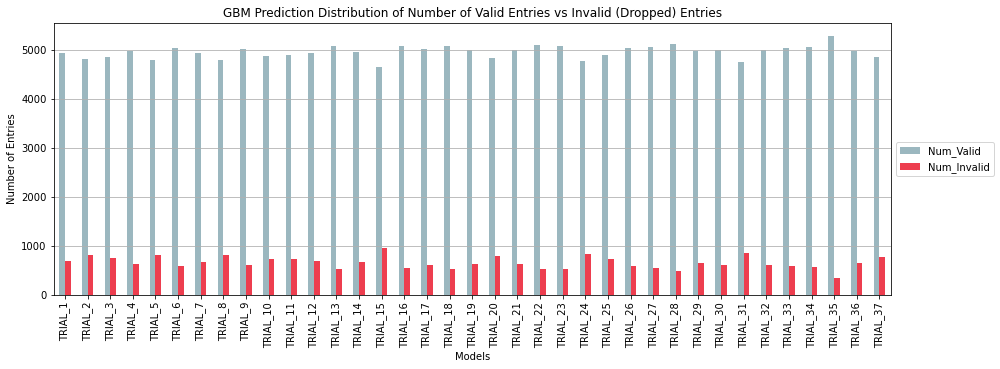

In [13]:
predator.predictions.plot_distribution_valid_vs_invalid("gbm")

2021-11-17 16:45:26 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


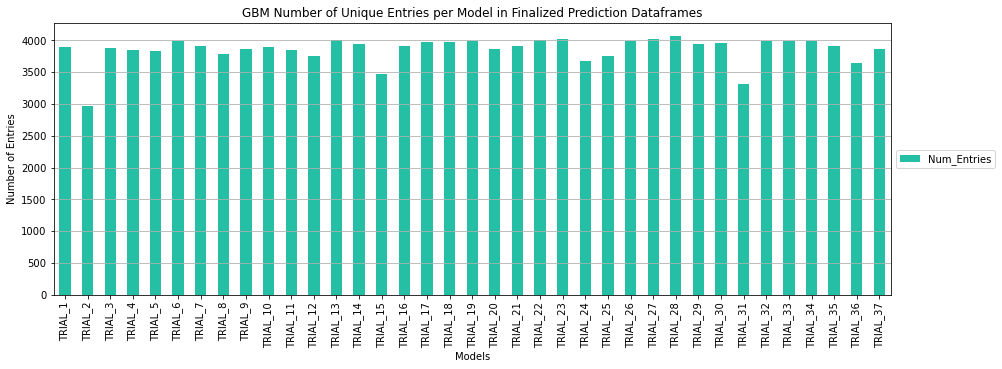

In [14]:
predator.predictions.plot_num_finalized_predictions("gbm")

In [15]:
display_data(predator.predictions['gbm_finalized_prediction_dataframes'][0])

Data dimensions: (3898, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.880324,P46734,K200E,P27361
1,0.936987,P46734,K200E,P27361
2,0.722624,P46734,K200E,P27361


In [16]:
predator.prepare_ensemble_prediction_data()

2021-11-17 16:45:27 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:45:27 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for gbm taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-17 16:52:10 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for gbm is prepared.
Accessible from `gbm_predictions_prob_data`.
2021-11-17 16:52:10 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for gbm is prepared.
Accessible from `gbm_ensemble_prediction_data`.
2021-11-17 16:52:10 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for gbm.
Accessible from predictions.['gbm_prediction_results']
2021-11-17 16:52:10 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for gbm.
Accessible from predictions.['gbm_prediction_results_no_votes_dropped']


In [17]:
display_data(predator.predictions['gbm_predictions_prob_data'])

Data dimensions: (3032, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.846645,1.0,0.858049,0.765066,0.795043,0.846373,0.791089,0.847025,0.672545,0.738855,...,0.844444,0.722101,0.805508,0.764524,0.839221,0.836098,0.786694,0.864899,0.8174,1
1,0.958112,1.0,0.923585,0.838551,0.965036,0.939348,0.840953,0.979777,0.800082,0.824042,...,0.997222,1.0,0.923768,0.943153,0.88706,0.842702,0.840259,0.933477,0.9181,1
2,0.895405,0.314583,0.861221,0.852036,0.842754,0.927404,0.82115,0.945364,0.596322,0.776608,...,0.872222,0.92439,0.847524,0.894536,0.843537,0.842702,0.806321,0.830031,0.84646,1


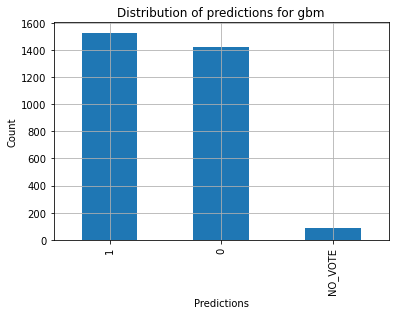

In [18]:
predator.predictions.plot_ensemble_prediction_distribution("gbm")

In [19]:
gbm_prediction_results_soft = predator.predictions['gbm_prediction_results']
display_data(gbm_prediction_results_soft)

Data dimensions: (3032, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P46734,K200E,P27361,1
1,P46734,K200E,Q16512,1
2,P46734,K200E,Q5S007,1


In [20]:
gbm_prediction_results_soft_no_votes_dropped = predator.predictions["gbm_prediction_results_no_votes_dropped"]
display_data(gbm_prediction_results_soft_no_votes_dropped)

Data dimensions: (2945, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P46734,K200E,P27361,1
1,P46734,K200E,Q16512,1
2,P46734,K200E,Q5S007,1


Label counts:
Disrupting                1418
Increasing + No Effect    1527
Name: Prediction, dtype: int64


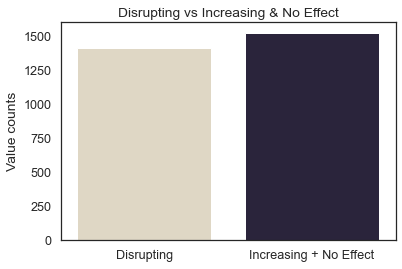

In [21]:
visualize_label_counts(gbm_prediction_results_soft_no_votes_dropped, 'Prediction')

In [22]:
gbm_ensemble_prediction_data_soft = predator.predictions["gbm_ensemble_prediction_data"]

In [23]:
gbm_predictions_prob_data_soft = predator.predictions["gbm_predictions_prob_data"]

In [24]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [25]:
gbm_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["gbm_prediction_results"],
    predictions_prob_data=predator.predictions["gbm_predictions_prob_data"]
)
gbm_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P46734,K200E,P27361,1,0.8174
1,P46734,K200E,Q16512,1,0.9181
2,P46734,K200E,Q5S007,1,0.84646
3,P46734,K200E,Q9Y2U5,1,0.8072
4,P46734,K200E,Q99759,1,0.85617


In [26]:
gbm_prediction_results_soft_no_votes_dropped_with_median_probabilities = gbm_prediction_results_soft_with_median_probs[
    gbm_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [27]:
len(gbm_prediction_results_soft_no_votes_dropped_with_median_probabilities)

2945

## Exporting Predictions

In [28]:
# gbm_prediction_results = gbm_prediction_results_hard_no_votes_dropped
# gbm_prediction_results = gbm_prediction_results_soft_no_votes_dropped
gbm_prediction_results = gbm_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(gbm_prediction_results)

Data dimensions: (2945, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P46734,K200E,P27361,1,0.8174
1,P46734,K200E,Q16512,1,0.9181
2,P46734,K200E,Q5S007,1,0.84646


In [29]:
predator.export_prediction(
    tcga="gbm",
    data=gbm_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2021-11-17 16:52:27 | DEBUG    | helpers.helpers_predator.common | Folder with ID b9cfc7ea is created.
2021-11-17 16:52:27 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder gbm_prediction_2021-11-17\b9cfc7ea..
2021-11-17 16:52:27 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/gbm_prediction_2021-11-17\b9cfc7ea\predictions_soft_2021-11-17.csv is exported successfully.
2021-11-17 16:52:27 | INFO     | helpers.helpers_predator.common | Config is exported.


---